In [82]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [83]:
import sys
import os

# Get the absolute path to the parent directory containing "02504 Computer Vision"
parent_dir = os.path.abspath(os.path.join("../..", "02504-Computer-Vision"))

# Add it to sys.path
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

from utility import Pi, Piinv, skew

In [84]:
data = np.load('data/Fest_test.npy', allow_pickle=True).item()
print(data)
q1 = data['q1']
q2 = data['q2']
Ftrue = data['Ftrue']
q1.shape, q2.shape, Ftrue.shape


{'q1': array([[192.80308677, 383.84844629, 552.40550165, 395.55690526,
        416.17883753, 366.71606701, 649.12832188, 437.85457401],
       [482.655306  , 522.55261707, 373.4083753 , 550.57520093,
        157.95394133, 379.58268042, 141.20188192, 571.00584606],
       [  1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ]]), 'q2': array([[ 77.42041221, 254.60721249, 469.08032639, 278.08133782,
        308.0810652 , 270.86822192, 508.91666875, 288.72429284],
       [479.74166846, 521.16039433, 373.38678026, 549.34478578,
        157.66285399, 378.83939131, 138.78418921, 569.99677028],
       [  1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ]]), 'Ftrue': array([[ 6.67972386e-12, -7.85049967e-10,  1.17921973e-07],
       [-9.75936980e-10, -4.86806510e-12,  3.28699196e-05],
       [ 4.23506610e-07, -3.21704080e-05, -2.12002228e-04]])}


((3, 8), (3, 8), (3, 3))

## Ex 9.1
![8points](data/8points.png)

In [85]:
def Fest_8point(q1_list: np.array, q2_list: np.array):
    """
    Estimates a fundamental matrix from eight or more point correspondences, using the linear algorithm.
    Args:
        q1_list (np.array): list of homogeneous 2D points in one image
        q2_list  (np.array): list of homogeneous 2D points in another image

    Return:
        F (np.array): fundamental matrix
    """
    if q1_list.shape[1] < 8:
        print("Not enough points in q1")
        return
    if q2_list.shape[1] < 8:
        print("Not enough points in q2")
        return
    if q1_list.shape[0] == 2:
        q1_list = Piinv(q1_list)
    if q2_list.shape[0] == 2:
        q2_list = Piinv(q2_list)
    B = []
    num_points = q1_list.shape[1]
    for i in range(num_points):
        q1 = q1_list[:, i].reshape(3, 1)
        q2 = q2_list[:, i].reshape(3, 1)
        B_i = (q2 @ q1.T).flatten()
        B.append(B_i)
    B = np.vstack(B)
    U, S, Vt = np.linalg.svd(B)
    F = Vt[-1, :].reshape(3, 3)
    return F

In [86]:
Ftrue_normalized = Ftrue / Ftrue[-1, -1]
print(f"Ftrue_normalized: {Ftrue_normalized}")

F_est = Fest_8point(q1, q2)
print(f"F_est norm: {F_est / F_est[-1, -1]}")

Ftrue_normalized: [[-3.15078002e-08  3.70302696e-06 -5.56229877e-04]
 [ 4.60342794e-06  2.29623299e-08 -1.55045161e-01]
 [-1.99765169e-03  1.51745612e-01  1.00000000e+00]]
F_est norm: [[-3.15078003e-08  3.70302696e-06 -5.56229876e-04]
 [ 4.60342794e-06  2.29623299e-08 -1.55045161e-01]
 [-1.99765169e-03  1.51745612e-01  1.00000000e+00]]


## Ex 9.2

{'im1': array([[17, 17, 14, ..., 19, 18, 20],
       [15, 16, 15, ..., 18, 17, 19],
       [14, 14, 15, ..., 18, 18, 21],
       ...,
       [13, 14, 16, ...,  4,  4,  5],
       [13, 13, 14, ...,  4,  5,  6],
       [12, 13, 14, ...,  6,  6,  5]], dtype=uint8), 'im2': array([[14, 15, 12, ..., 22, 20, 21],
       [13, 14, 14, ..., 21, 19, 20],
       [13, 12, 13, ..., 19, 20, 22],
       ...,
       [14, 19, 38, ...,  5,  5,  6],
       [27, 56, 90, ...,  5,  6,  7],
       [49, 76, 74, ...,  5,  7,  6]], dtype=uint8), 'R1': array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]), 'R2': array([[ 9.97063888e-01,  1.21564307e-04,  7.65740684e-02],
       [-1.37753401e-04,  9.99999969e-01,  2.06135565e-04],
       [-7.65740409e-02, -2.16078666e-04,  9.97063874e-01]]), 't1': array([[0.],
       [0.],
       [0.]]), 't2': array([[-0.04594547],
       [-0.00017171],
       [ 0.00157051]]), 'K': array([[1.41448973e+03, 0.00000000e+00, 4.01393651e+02],
       [0.00000000e+00, 1.4142707

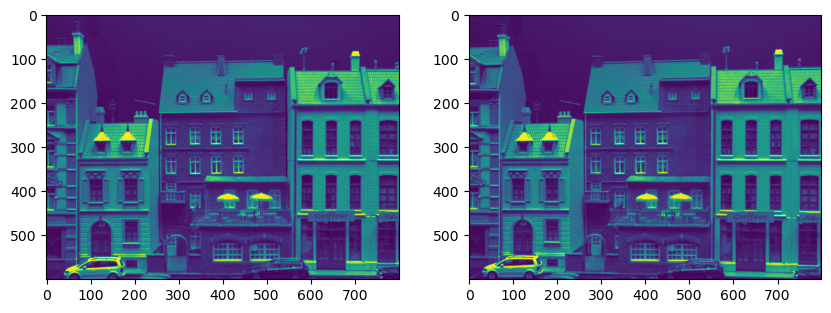

In [87]:
data = np.load("data/TwoImageData.npy", allow_pickle=True).item()
print(data)
im1 = data["im1"]
im2 = data["im2"]
R1 = data["R1"]
R2 = data["R2"]
t1 = data["t1"]
t2 = data["t2"]
K = data["K"]
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(im1)
axes[1].imshow(im2)

In [88]:
R = R2 @ R1.T
t = R2 @ (t1 - t2)
E = skew(t) @ R
F_true = np.linalg.inv(K).T @ E @ np.linalg.inv(K)
F_true


array([[-6.66701863e-12,  2.54146459e-09, -6.63241245e-07],
       [-7.85086207e-10,  4.62695184e-12, -3.21733502e-05],
       [ 1.23759220e-07,  3.12850650e-05,  2.70428056e-04]])

In [89]:
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(im1, None)
kp2, des2 = sift.detectAndCompute(im2, None)

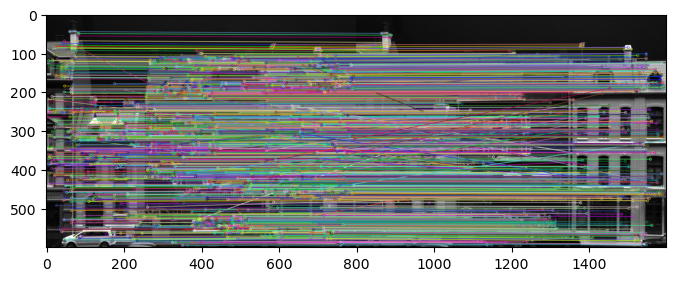

In [90]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
# Initialize img3 with the first image to draw matches on
img3 = im1.copy()
img3 = cv2.drawMatchesKnn(im1, kp1, im2, kp2, good, outImg=img3, flags=2)

plt.imshow(img3)

### Alternate code

In [91]:
import matplotlib as mpl

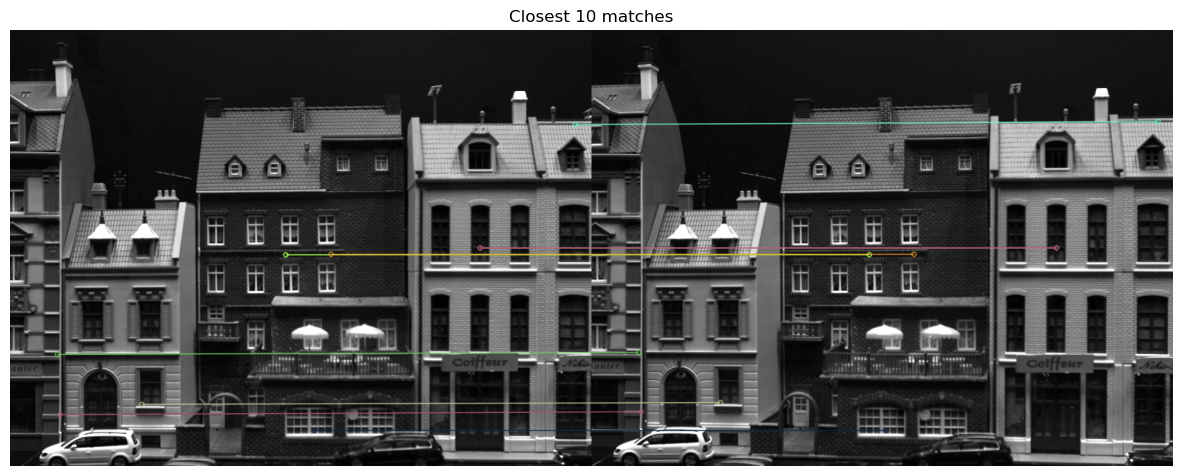

Number of matches: 2086


In [92]:
# Alernative
def find_features(im1, im2, plot=False):
    """
    Find matching features between two images.

    Args:
        im1 (np.ndarray): The first image.
        im2 (np.ndarray): The second image.

    Returns:
        matches (list): Matching features (cv2.DMatch objects).
        kp1 (list): Keypoints in the first image.
        kp2 (list): Keypoints in the second image.
    """
    # Initiate SIFT detector
    sift = cv2.SIFT_create()

    # Find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(im1, None)
    kp2, des2 = sift.detectAndCompute(im2, None)

    # Create BFMatcher object
    bf = cv2.BFMatcher(crossCheck=True)

    # Match descriptors
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)  # ascending

    # Draw first 10 matches.
    if plot:
        img3 = cv2.drawMatches(
            im1,
            kp1,
            im2,
            kp2,
            matches[:10],
            None,
            flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
        )
        mpl.rcParams["figure.figsize"] = [15, 10]
        plt.imshow(img3)
        plt.axis("off")
        plt.title("Closest 10 matches")
        plt.show()
        mpl.rcParams["figure.figsize"] = [8, 6]

    return matches, kp1, kp2


# Feature matching is correct when the connecting lines are mostly parallel.
matches, kp1, kp2 = find_features(im1, im2, plot=True)
print(f"Number of matches: {len(matches)}")

## Ex 9.3

In [93]:
sampled_matches = np.random.choice(matches, 8, replace=False)
# matched_points = np.array(
#     [
#         (
#             kp1[m.queryIdx].pt[0],
#             kp1[m.queryIdx].pt[1],
#             kp2[m.trainIdx].pt[0],
#             kp2[m.trainIdx].pt[1],
#         )
#         for m in sampled_matches
#     ]
# )
# matched_points = np.array(matched_points)
# matched_points.shape
im1_samples = np.array(
    [(kp1[m.queryIdx].pt[0], kp1[m.queryIdx].pt[1]) for m in sampled_matches]
)
im2_samples = np.array(
    [(kp2[m.trainIdx].pt[0], kp2[m.trainIdx].pt[1]) for m in sampled_matches]
)
im1_samples.shape, im2_samples.shape

((8, 2), (8, 2))

In [94]:
im1_samples = im1_samples.reshape(2, -1)
im2_samples = im2_samples.reshape(2, -1)
Fest_8point(im1_samples, im2_samples)

array([[ 3.79035657e-05,  4.03344380e-05,  1.26971374e-02],
       [-6.54382356e-05, -1.18321110e-05,  1.73315548e-02],
       [-2.87341403e-02, -5.56997037e-03,  9.99340641e-01]])

![sampon's](data/sampson's.png)

In [ ]:
def SampsonsDistance(F: np.array, p1: np.array, p2: np.array):
    """
    Find sampsons distance between two points

    Args:
        F (np.array): fundamental matrix
        p1 (np.array): list of points in first image
        p2 (np.array): list of points in second image

    Returns:
        sampsons (np.array): sampon's distances between points
    """
    if p1.shape[0] == 2:
        p1 = Piinv(p1)
    if p2.shape[0] == 2:
        p2 = Piinv(p2)
    sampsons = []
    num_points = p2.shape[1]
    for i in range(num_points):
        q1 = p1[:, i]
        q2 = p2[:, i]
        numerator = (q2.T @ F @ q1)**2
        ## TODO FIGURE OUT THE WEIRD NOTATION???????
        denominator = (
            (q2.T @ F[0]) ** 2
            + (q2.T @ F[1]) ** 2
            + (F @ q1)[0] ** 2
            + (F @ q1)[1] ** 2
        )
        distance = numerator / denominator
        sampsons.append(distance)
    sampsons = np.array(sampsons)
    return sampsons

    

In [96]:
def RANSAC_FUNDAMENTAL_MATRIX(im1: np.array, im2: np.array, iterations: int, threshold: float):
    """
    Runs RANSAC for a number of iterations to find best model with the most amount of inliers 
    and obtain an estimated fundamental matrix based on inliers
        Args:
            im1 (np.array): first image
            im2 (np.array): second image
            iterations (int): number of iterations to run RANSAC
            threshold (float): threshold to determine whether a point is an inlier or outlier

        Return:
            best_F (np.array): An estimate of fundamental matrix based on inliers
    """
    most_inliers = 0
    best_inliers = []
    best_F = np.zeros((3, 3))
    matches, kp1, kp2 = find_features(im1, im2)
    im1_matches = np.array(
        [(kp1[m.queryIdx].pt[0], kp1[m.queryIdx].pt[1]) for m in matches]
    )
    im2_matches = np.array(
        [(kp2[m.trainIdx].pt[0], kp2[m.trainIdx].pt[1]) for m in matches]
    )
    for _ in range(iterations):
        sampled_matches = np.random.choice(matches, 8, replace=False)
        im1_samples = np.array(
            [(kp1[m.queryIdx].pt[0], kp1[m.queryIdx].pt[1]) for m in sampled_matches]
        ).reshape(2, -1)
        im2_samples = np.array(
            [(kp2[m.trainIdx].pt[0], kp2[m.trainIdx].pt[1]) for m in sampled_matches]
        ).reshape(2, -1)
        f_est = Fest_8point(im1_samples, im2_samples)
        sampsons = SampsonsDistance(f_est, im1_samples, im2_samples)
        inliers = [idx for idx, dist in enumerate(sampsons) if dist < threshold]
        inliers = np.array([im1_matches[inliers], im2_matches[inliers]])
        num_inliers = inliers.shape[1]
        if num_inliers > most_inliers:
            most_inliers = num_inliers
            best_inliers = inliers
            best_F = f_est
    # Refit dataset and calculate best F using only inliers
    best_F = Fest_8point(best_inliers[0].T, best_inliers[1].T)
    return best_inliers, best_F

In [97]:
iters = 200
threshold = 3.84 * 3**2  # 34.56
best_inliers, best_F = RANSAC_FUNDAMENTAL_MATRIX(
    im1,
    im2,
    iters,
    threshold,
)
best_F

array([[-4.23645714e-06, -2.76703172e-04,  3.69682347e-03],
       [ 2.21202866e-04,  2.16119838e-05,  7.03780123e-01],
       [ 1.40420806e-02, -7.08345881e-01,  5.22367620e-02]])

In [98]:
Ftrue_normalized = F_true / F_true[-1, -1]
print(f"Ftrue_normalized: {Ftrue_normalized}")

print(f"best_F norm: {best_F / best_F[-1, -1]}")

Ftrue_normalized: [[-2.46535760e-08  9.39793238e-06 -2.45256078e-03]
 [-2.90312410e-06  1.71097330e-08 -1.18971939e-01]
 [ 4.57641941e-04  1.15687201e-01  1.00000000e+00]]
best_F norm: [[-8.11010671e-05 -5.29709654e-03  7.07705325e-02]
 [ 4.23462056e-03  4.13731306e-04  1.34728895e+01]
 [ 2.68816062e-01 -1.35602946e+01  1.00000000e+00]]


In [99]:
(best_F * F_true).sum() / (np.linalg.norm(best_F) * np.linalg.norm(F_true))

-0.1119117369374065